In [80]:
import pandas as pd

In [81]:
df = pd.read_csv('data/test/오존.csv')
df1 = pd.read_csv('data/test/평균기온.csv')
df2 = pd.read_csv('data/test/평균최고기온.csv')
df3 = pd.read_csv('data/test/평균최저기온.csv')
df4 = pd.read_csv('data/test/평균증기압.csv')

In [82]:
# df와 df1을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [83]:
# result_df와 df2을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [84]:
# result_df와 df3을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df3, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [85]:
# result_df와 df4을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df4, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [86]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_오존,오존0.06_BAD,오존0.1_BAD,오존_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
0,서울특별시,201001,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
1,부산광역시,201001,0.021,N,N,N,3.0,7.7,-1.1,3.5


In [87]:
dd = result_df['STD_YYYYMM'].dtype

print(f"result_df['STD_YYYYMM'].dtype: {dd}")

result_df['STD_YYYYMM'].dtype: int64


In [88]:
# 그룹별로 NaN 값을 평균값으로 대체
result_df['AVG_오존'] = result_df.groupby(['SIDO', 'STD_YYYYMM'])['AVG_오존'].transform(lambda x: x.fillna(x.mean()))
# 필요한 경우, 여전히 NaN 값이 있는 경우에 대비해 전체 평균값으로 대체할 수도 있습니다
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(result_df['AVG_오존'].mean())
result_df.isna().sum()

SIDO          0
STD_YYYYMM    0
AVG_오존        0
오존0.06_BAD    0
오존0.1_BAD     0
오존_BAD        0
평균기온          0
평균최고기온        0
평균최저기온        0
평균증기압         0
dtype: int64

In [89]:
result_df.tail()

,SIDO,STD_YYYYMM,AVG_오존,오존0.06_BAD,오존0.1_BAD,오존_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
2647,전라북도,202212,0.0230,N,N,N,-1.1,4.1,-5.7,4.0
2648,전라남도,202212,0.0248,N,N,N,2.1,6.6,-1.9,4.7
2649,경상북도,202212,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2650,경상남도,202212,0.0238,N,N,N,1.1,6.7,-3.7,3.7
2651,제주특별자치도,202212,0.0365,N,N,Y,6.8,9.8,4.0,6.6


In [90]:
# 피벗 테이블 생성
pivot_df = result_df.pivot_table(index='STD_YYYYMM', columns='SIDO', values='AVG_오존', fill_value=0)

# 인덱스 초기화
pivot_df.reset_index(inplace=True)

print(pivot_df)

SIDO  STD_YYYYMM     강원도     경기도    경상남도    경상북도  광주광역시  대구광역시  대전광역시  부산광역시  \
0         201001  0.0204  0.0111  0.0189  0.0187  0.017  0.014  0.011  0.021   
1         201002  0.0228  0.0154  0.0219  0.0210  0.019  0.018  0.015  0.024   
2         201003  0.0294  0.0235  0.0286  0.0290  0.026  0.025  0.023  0.031   
3         201004  0.0358  0.0264  0.0331  0.0348  0.031  0.030  0.027  0.033   
4         201005  0.0422  0.0326  0.0370  0.0380  0.039  0.034  0.037  0.036   
..           ...     ...     ...     ...     ...    ...    ...    ...    ...   
151       202208  0.0278  0.0304  0.0285  0.0280  0.029  0.028  0.027  0.030   
152       202209  0.0266  0.0294  0.0306  0.0279  0.031  0.029  0.028  0.034   
153       202210  0.0244  0.0220  0.0298  0.0266  0.030  0.027  0.023  0.032   
154       202211  0.0249  0.0175  0.0265  0.0251  0.024  0.020  0.018  0.027   
155       202212  0.0237  0.0150  0.0238  0.0240  0.021  0.018  0.015  0.022   

SIDO  서울특별시   세종특별자치시  울산광역시  인천광역시    

In [91]:
pivot_df.columns

Index(['STD_YYYYMM', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='SIDO')

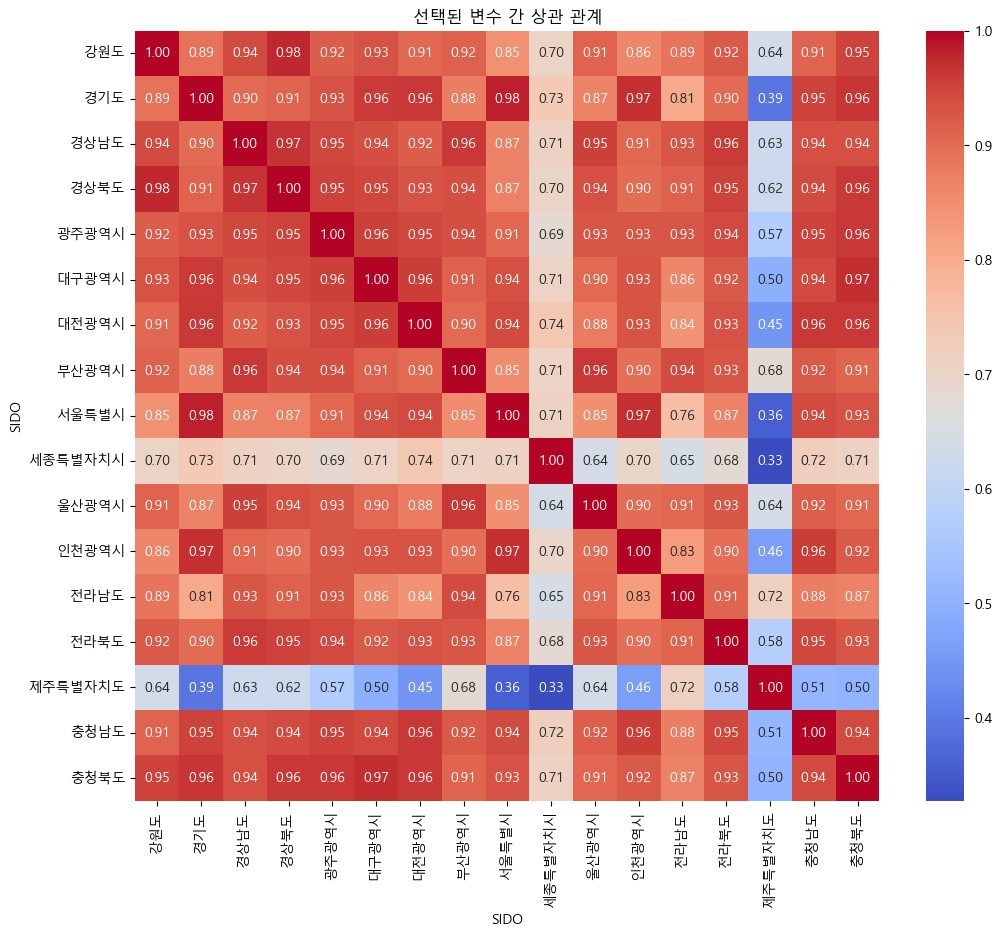

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 날짜 데이터 변환
pivot_df['Year'] = pivot_df['STD_YYYYMM'].astype(str).str[:4].astype(int)
pivot_df['Month'] = pivot_df['STD_YYYYMM'].astype(str).str[4:].astype(int)



# 필요한 경우, 원래 'STD_YYYYMM' 및 'SIDO' 컬럼 제거
pivot_df.drop(['STD_YYYYMM'], axis=1, inplace=True)

# 전체 상관관계 행렬 계산
full_corr_matrix = pivot_df.corr()

# 시각화용 상관관계 행렬 생성 (시간 및 도시 컬럼 제외)
visualization_columns = [col for col in pivot_df.columns if 'Year' not in col and 'Month' not in col and not col.startswith('SIDO')]
vis_corr_matrix = pivot_df[visualization_columns].corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(vis_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('선택된 변수 간 상관 관계')
plt.show()


In [93]:
ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇ

NameError: name 'ᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋᄋ' is not defined

In [ ]:
# 'SIDO' 열에서 '서울특별시'인 행만 필터링
seoul_df = result_df[result_df['SIDO'] == '서울특별시']


In [ ]:
# 'STD_YYYYMM'을 인덱스로 사용
seoul_df['STD_YYYYMM'] = pd.to_datetime(seoul_df['STD_YYYYMM'], format='%Y%m')
seoul_df = seoul_df.set_index('STD_YYYYMM')

C:\Users\human\AppData\Local\Temp\ipykernel_2668\1799982633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_df['STD_YYYYMM'] = pd.to_datetime(seoul_df['STD_YYYYMM'], format='%Y%m')


In [ ]:
seoul_df.tail(2)

,SIDO,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,,
2022-11-01,서울특별시,0.018,N,N,N,10.0,15.4,5.6,8.2
2022-12-01,서울특별시,0.015,N,N,N,-2.8,1.7,-6.6,3.1


In [ ]:
# 원래의 'SIDO' 열 삭제
seoul_df.drop('SIDO', axis=1, inplace=True)

In [ ]:
seoul_df.head()

,AVG_오존,오존_BAD,오존0.06_BAD,오존0.1_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,
2010-01-01,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
2010-02-01,0.016,N,N,N,1.4,4.9,-1.7,4.5
2010-03-01,0.024,N,N,N,4.3,8.1,0.5,4.9
2010-04-01,0.026,N,N,N,9.5,14.0,5.6,6.5
2010-05-01,0.030,Y,N,N,17.2,22.0,13.0,11.9


In [ ]:
# 열 이름에 'BAD' 문자열을 포함하는 열을 찾아 삭제
seoul_df = seoul_df.loc[:, ~seoul_df.columns.str.contains('BAD')]


In [ ]:
seoul_df.tail(10)

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,
2022-03-01,0.028,7.7,12.7,3.2,6.7
2022-04-01,0.043,14.8,20.6,10.0,9.2
2022-05-01,0.049,19.1,25.0,13.9,12.0
2022-06-01,0.036,23.3,27.5,19.8,20.9
2022-07-01,0.037,27.3,31.0,24.2,27.7
2022-08-01,0.030,25.7,28.9,23.1,26.6
2022-09-01,0.031,22.4,27.2,18.2,18.2
2022-10-01,0.023,14.6,19.7,10.3,11.6
2022-11-01,0.018,10.0,15.4,5.6,8.2


In [ ]:
seoul_df.columns.value_counts()

AVG_오존    1
평균기온      1
평균최고기온    1
평균최저기온    1
평균증기압     1
Name: count, dtype: int64

In [ ]:
seoul_df

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,
2010-01-01,0.011,-4.5,-0.7,-8.1,3.1
2010-02-01,0.016,1.4,4.9,-1.7,4.5
2010-03-01,0.024,4.3,8.1,0.5,4.9
2010-04-01,0.026,9.5,14.0,5.6,6.5
2010-05-01,0.030,17.2,22.0,13.0,11.9
...,...,...,...,...,...
2022-08-01,0.030,25.7,28.9,23.1,26.6
2022-09-01,0.031,22.4,27.2,18.2,18.2
2022-10-01,0.023,14.6,19.7,10.3,11.6


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = seoul_df.values

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.8 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = seoul_df.index[:n_train]
test_dates = seoul_df.index[n_train:]

# 데이터셋 재구성
seq_len = 6  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 0])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(trainX, trainY, epochs=50, batch_size=15, validation_split=0.1, verbose=1)

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]



Epoch 1/50
8/8 [==============================] - 5s 133ms/step - loss: 0.8009 - val_loss: 0.2871
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.4296 - val_loss: 0.6810
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3116 - val_loss: 0.2891
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2522 - val_loss: 0.2572
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.2786 - val_loss: 0.3941
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2701 - val_loss: 0.1688
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.2290 - val_loss: 0.2009
Epoch 8/50
8/8 [==============================] - 0s 12ms/step - loss: 0.2237 - val_loss: 0.3882
Epoch 9/50
8/8 [==============================] - 0s 11ms/step - loss: 0.2363 - val_loss: 0.2156
Epoch 10/50
8/8 [==============================] - 0s 11ms/step - loss: 0.1835 - val_loss: 0.0872
Epoch 11/50
8/8 [===========

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.589182933964839e-05
Mean Absolute Error: 0.004116206373314958


In [ ]:
from sklearn.metrics import r2_score

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)

print("R-squared (Coefficient of Determination):", r_squared)

R-squared (Coefficient of Determination): 0.7438853287444789


In [ ]:
len(prediction_transformed), len(testY_transformed)

(26, 26)

In [ ]:
print(f'prediction_transformed: {len(prediction_transformed)}, testY_transformed: {len(testY_transformed)}')

prediction_transformed: 26, testY_transformed: 26


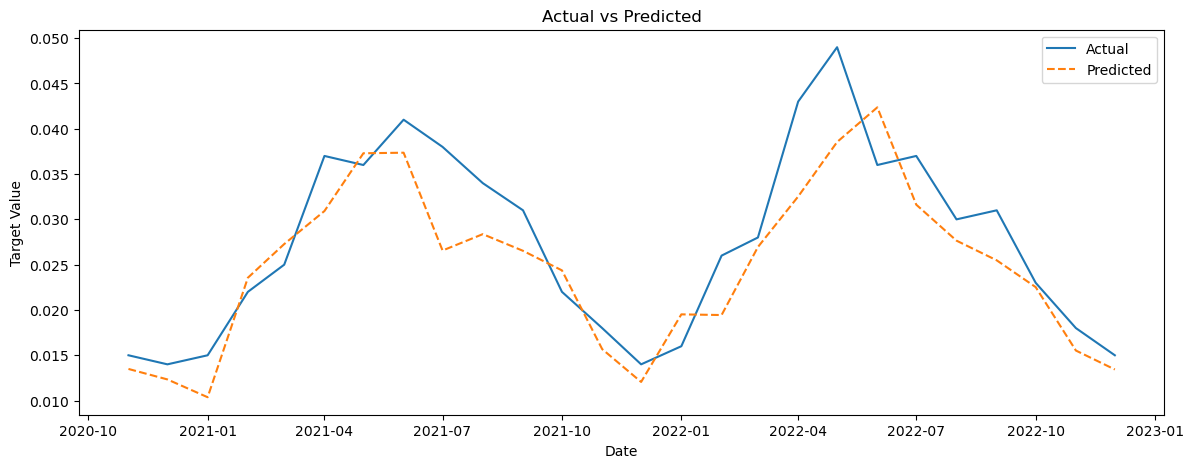

In [ ]:
# 실제값과 예측값의 날짜 배열을 조정
adjusted_test_dates = test_dates[len(test_dates) - len(testY_transformed):]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(adjusted_test_dates, testY_transformed, label='Actual')
plt.plot(adjusted_test_dates, prediction_transformed, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


그래프에 나타난 점이 중복되어 보이는 경우, 몇 가지 가능한 원인이 있을 수 있습니다:

데이터 중복: 같은 날짜에 대해 두 개 이상의 데이터 포인트가 있을 수 있습니다. 이것은 데이터셋 내의 중복된 행이나 데이터의 집계 방식에 오류가 있을 때 발생할 수 있습니다.

데이터 포인트의 겹침: 예측값과 실제값이 유사하여 그래프 상에서 겹쳐 보일 수 있습니다. 만약 실제값과 예측값이 거의 일치한다면, 두 선이 겹쳐져서 한 선처럼 보이지 않고, 별도의 점으로 나타날 수 있습니다.

시각화 코드: 시각화 코드가 같은 날짜에 대해 여러 점을 그리도록 구현되었을 수 있습니다. 예를 들어, plt.plot() 함수에 같은 날짜가 여러 번 나타날 경우 이런 현상이 발생할 수 있습니다.

데이터 전처리 오류: 데이터 전처리 과정에서 예측값이나 실제값 배열을 생성할 때 어떤 실수로 인해 데이터가 잘못된 위치에 할당되었을 수도 있습니다.

이 현상을 정확히 파악하려면 데이터와 시각화 코드를 자세히 검토할 필요가 있습니다. 일단 데이터프레임에 중복된 날짜가 있는지 확인하고, 이를 제거하는 것이 좋습니다. 중복을 확인하려면 다음과 같은 코드를 사용할 수 있습니다:

In [ ]:
# 날짜별로 데이터가 중복되었는지 확인
duplicates = result_df.index.duplicated()
print("Number of duplicates in the index: ", duplicates.sum())

Number of duplicates in the index:  0


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 25ms/step


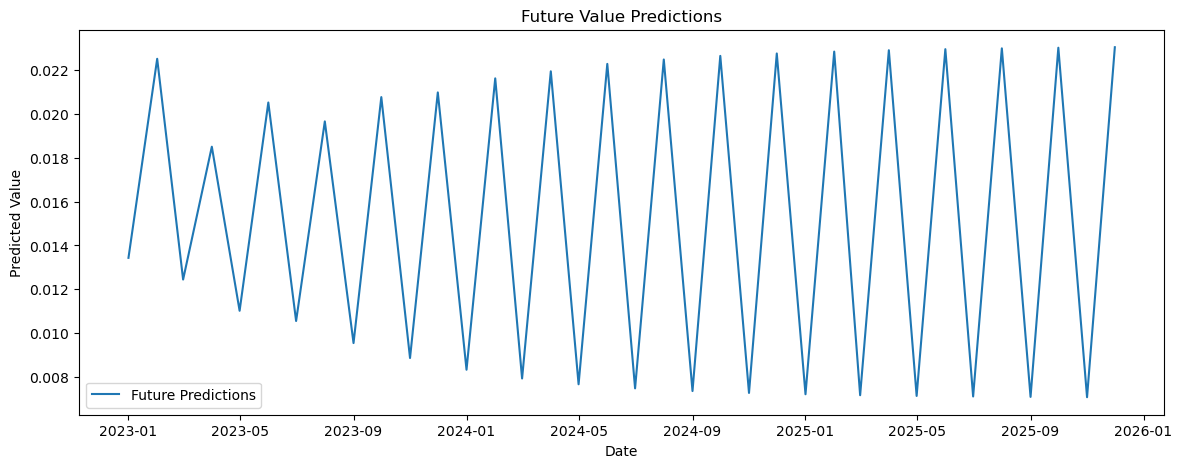

In [ ]:
def predict_future_dynamic_seq_len(model, initial_seq, future_steps, initial_seq_len, input_dim, max_seq_len, step_size):
    current_seq = initial_seq.copy()
    future_predictions = []
    current_seq_len = initial_seq_len

    for step in range(future_steps):
        # 현재 시퀀스를 바탕으로 예측
        current_seq_reshaped = current_seq[-(current_seq_len*input_dim):].reshape(1, current_seq_len, input_dim)
        next_prediction = model.predict(current_seq_reshaped)[0, 0]

        # 예측 결과 저장
        future_predictions.append(next_prediction)

        # 새로운 예측값 추가
        new_seq = np.zeros((current_seq_len+1, input_dim))
        new_seq[:-1, :] = current_seq.reshape(current_seq_len, input_dim)
        new_seq[-1, 0] = next_prediction

        # 시퀀스 길이 조정
        if current_seq_len < max_seq_len:
            current_seq_len += 1
        elif current_seq_len == max_seq_len:
            current_seq_len = max_seq_len
        # 현재 시퀀스 업데이트
        current_seq = new_seq[-current_seq_len:].flatten()

    return future_predictions



# 함수 사용 예시
future_steps = 36
initial_seq_len = 6  # 초기 시퀀스 길이
max_seq_len = 42  # 최대 시퀀스 길이 설정

step_size = 1
latest_sequence = testX[-1]
future_predictions = predict_future_dynamic_seq_len(model, latest_sequence, future_steps, initial_seq_len, input_dim, max_seq_len, step_size)

# 이하 코드는 동일하게 역변환 및 시각화 수행

# 예측된 값들을 원래 데이터셋과 동일한 차원으로 확장
extended_predictions = np.zeros((len(future_predictions), data_scaled.shape[1]))
extended_predictions[:, 0] = future_predictions

# 역변환을 통해 원래 스케일로 변환
future_predictions_transformed = scaler.inverse_transform(extended_predictions)[:, 0]

# 미래 날짜 생성 - 월의 시작일을 기준으로
future_dates = pd.date_range(start=test_dates[-1], periods=future_steps + 1, freq='MS')[1:]


plt.figure(figsize=(14, 5))
plt.plot(future_dates[:len(future_predictions_transformed)], future_predictions_transformed, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Value Predictions')
plt.legend()
plt.show()


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 21ms/step


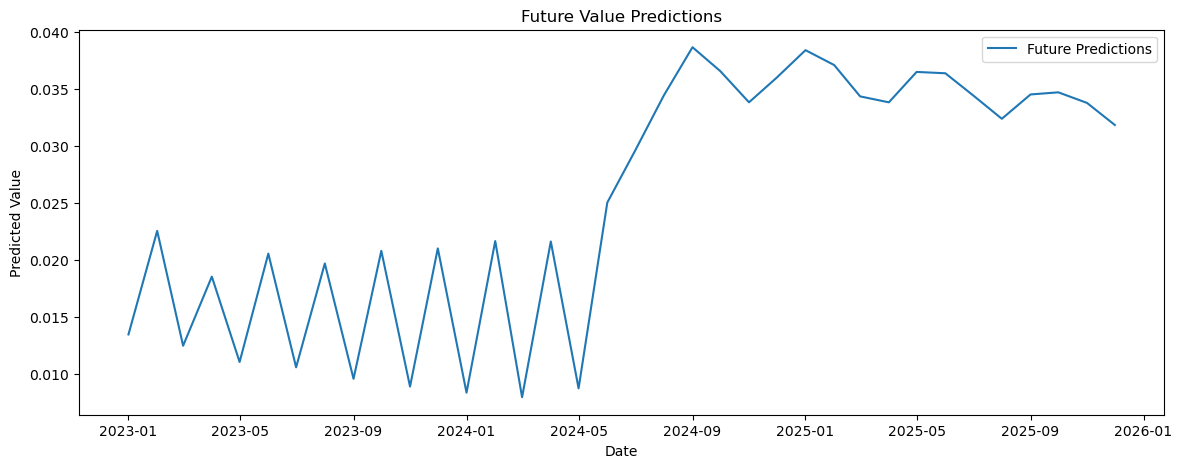

In [ ]:
# 지금 수정중인 코드
def predict_future_dynamic_seq_len(model, initial_seq, future_steps, initial_seq_len, max_seq_len, input_dim, step_size):
    current_seq = initial_seq.copy()
    future_predictions = []
    current_seq_len = initial_seq_len

    for step in range(future_steps):
        # 현재 시퀀스를 바탕으로 예측
        current_seq_reshaped = current_seq[-(current_seq_len*input_dim):].reshape(1, current_seq_len, input_dim)
        next_prediction = model.predict(current_seq_reshaped)[0, 0]

        # 예측 결과 저장
        future_predictions.append(next_prediction)

        # 다음 시퀀스 준비: 새로운 예측값 추가
        if current_seq_len < max_seq_len:
            new_seq = np.zeros((current_seq_len+1, input_dim))  # 시퀀스 길이 증가
            new_seq[:-1] = current_seq[-current_seq_len*input_dim:].reshape(current_seq_len, input_dim)
        else:
            new_seq = np.zeros((current_seq_len, input_dim))    # 시퀀스 길이 유지
            new_seq[:-1] = current_seq[-(current_seq_len-1)*input_dim:].reshape(current_seq_len-1, input_dim)

        new_seq[-1, 0] = next_prediction

        # 현재 시퀀스 업데이트 및 길이 조정
        current_seq = new_seq.flatten()
        current_seq_len = min(max_seq_len, current_seq_len + 1)


    return future_predictions

# 함수 사용 예시
future_steps = 36
initial_seq_len = 6  # 초기 시퀀스 길이
max_seq_len = 20    # 최대 시퀀스 길이 설정

step_size = 1
latest_sequence = testX[-1]
future_predictions = predict_future_dynamic_seq_len(model, latest_sequence, future_steps, initial_seq_len, max_seq_len, input_dim, step_size)
# 이하 코드는 동일하게 역변환 및 시각화 수행

# 예측된 값들을 원래 데이터셋과 동일한 차원으로 확장
extended_predictions = np.zeros((len(future_predictions), data_scaled.shape[1]))
extended_predictions[:, 0] = future_predictions

# 역변환을 통해 원래 스케일로 변환
future_predictions_transformed = scaler.inverse_transform(extended_predictions)[:, 0]

# 미래 날짜 생성 - 월의 시작일을 기준으로
future_dates = pd.date_range(start=test_dates[-1], periods=future_steps + 1, freq='MS')[1:]


plt.figure(figsize=(14, 5))
plt.plot(future_dates[:len(future_predictions_transformed)], future_predictions_transformed, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Value Predictions')
plt.legend()
plt.show()



1/1 [==============================] - 0s 23ms/step


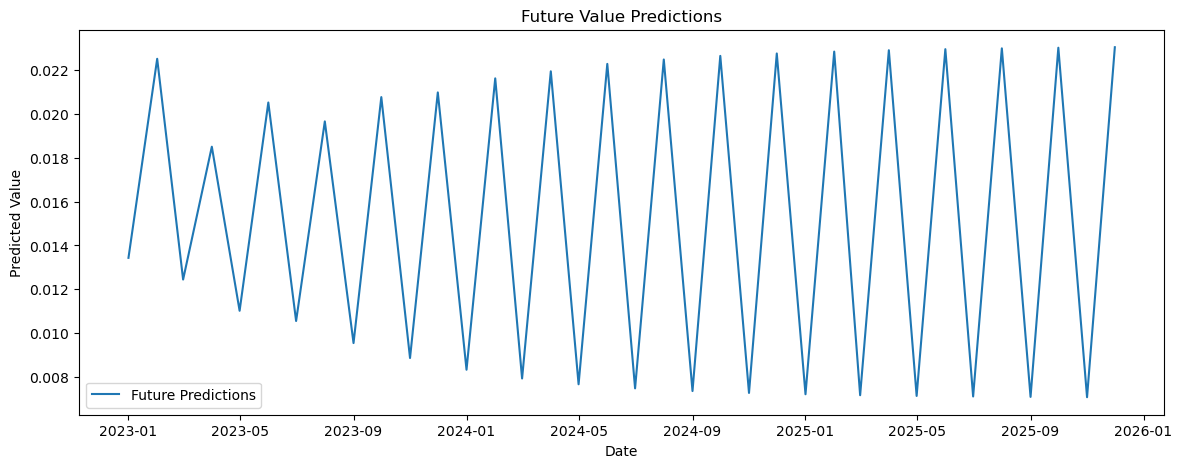

In [ ]:
def predict_future_dynamic_seq_len(model, initial_seq, future_steps, initial_seq_len, input_dim, step_size):
    current_seq = initial_seq.copy()
    future_predictions = []
    current_seq_len = initial_seq_len

    for step in range(future_steps):
        # 현재 시퀀스를 바탕으로 예측
        current_seq_reshaped = current_seq[-(current_seq_len*input_dim):].reshape(1, current_seq_len, input_dim)
        next_prediction = model.predict(current_seq_reshaped)[0, 0]

        # 예측 결과 저장
        future_predictions.append(next_prediction)

        # 다음 시퀀스 준비: 새로운 예측값 추가
        new_seq = np.zeros((current_seq_len+1, input_dim))
        new_seq[:-1] = current_seq[-current_seq_len*input_dim:].reshape(current_seq_len, input_dim)
        new_seq[-1, 0] = next_prediction

        # 현재 시퀀스 업데이트 및 길이 조정
        current_seq = new_seq[:max_seq_len].flatten()
        current_seq_len = min(max_seq_len, current_seq_len + 1)

    return future_predictions


# 함수 사용 예시
future_steps = 36
initial_seq_len = 6  # 초기 시퀀스 길이
max_seq_len = future_steps + initial_seq_len  # 최대 시퀀스 길이 설정

step_size = 1
latest_sequence = testX[-1]
future_predictions = predict_future_dynamic_seq_len(model, latest_sequence, future_steps, initial_seq_len, input_dim, step_size)

# 이하 코드는 동일하게 역변환 및 시각화 수행

# 예측된 값들을 원래 데이터셋과 동일한 차원으로 확장
extended_predictions = np.zeros((len(future_predictions), data_scaled.shape[1]))
extended_predictions[:, 0] = future_predictions

# 역변환을 통해 원래 스케일로 변환
future_predictions_transformed = scaler.inverse_transform(extended_predictions)[:, 0]

# 미래 날짜 생성 - 월의 시작일을 기준으로
future_dates = pd.date_range(start=test_dates[-1], periods=future_steps + 1, freq='MS')[1:]


plt.figure(figsize=(14, 5))
plt.plot(future_dates[:len(future_predictions_transformed)], future_predictions_transformed, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Value Predictions')
plt.legend()
plt.show()



In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
# 현재 학습된 모델 저장
model.save('data/current_trained_model.h5')
# 저장된 모델 로드
pretrained_model = load_model('data/current_trained_model.h5')

c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 'SIDO' 열에서 '서울특별시'인 행만 필터링
incheon_df = result_df[result_df['SIDO'] == '인천광역시']

In [ ]:
# 'STD_YYYYMM'을 인덱스로 사용
incheon_df['STD_YYYYMM'] = pd.to_datetime(incheon_df['STD_YYYYMM'], format='%Y%m')
incheon_df = incheon_df.set_index('STD_YYYYMM')
# 원래의 'SIDO' 열 삭제
incheon_df.drop('SIDO', axis=1, inplace=True)
# 열 이름에 'BAD' 문자열을 포함하는 열을 찾아 삭제
incheon_df = incheon_df.loc[:, ~incheon_df.columns.str.contains('BAD')]


C:\Users\human\AppData\Local\Temp\ipykernel_12236\3462914305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incheon_df['STD_YYYYMM'] = pd.to_datetime(incheon_df['STD_YYYYMM'], format='%Y%m')


In [ ]:
incheon_df.isna().sum()

AVG_오존    0
평균기온      0
평균최고기온    0
평균최저기온    0
평균증기압     0
dtype: int64

In [ ]:

# 2단계: 모델 레이어 수정
# 예: 마지막 두 레이어를 제외한 나머지 레이어 동결
for layer in pretrained_model.layers[:-1]:
    layer.trainable = False

# 3단계: 새 데이터셋 준비
data = incheon_df.values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

n_train = int(0.8 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]

seq_len = 22
input_dim = train_data.shape[1]

trainX, trainY = [], []
for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 0])

testX, testY = [], []
for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)



# 4단계: 모델 학습
pretrained_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
pretrained_model.fit(trainX, trainY, epochs=70, batch_size=30, validation_split=0.1, verbose=1)

# 예측 및 결과 분석
prediction = pretrained_model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 결과 시각화 등


Epoch 1/70
4/4 [==============================] - 4s 268ms/step - loss: 0.1267 - val_loss: 0.3636
Epoch 2/70
4/4 [==============================] - 0s 17ms/step - loss: 0.1285 - val_loss: 0.3409
Epoch 3/70
4/4 [==============================] - 0s 16ms/step - loss: 0.1329 - val_loss: 0.3308
Epoch 4/70
4/4 [==============================] - 0s 17ms/step - loss: 0.1291 - val_loss: 0.3454
Epoch 5/70
4/4 [==============================] - 0s 16ms/step - loss: 0.1273 - val_loss: 0.3636
Epoch 6/70
4/4 [==============================] - 0s 17ms/step - loss: 0.1265 - val_loss: 0.3896
Epoch 7/70
4/4 [==============================] - 0s 17ms/step - loss: 0.1236 - val_loss: 0.4176
Epoch 8/70
4/4 [==============================] - 0s 16ms/step - loss: 0.1243 - val_loss: 0.4504
Epoch 9/70
4/4 [==============================] - 0s 16ms/step - loss: 0.1255 - val_loss: 0.4579
Epoch 10/70
4/4 [==============================] - 0s 16ms/step - loss: 0.1229 - val_loss: 0.4403
Epoch 11/70
4/4 [===========

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)

print("R-squared (Coefficient of Determination):", r_squared)

Mean Squared Error: 4.407793169647097e-05
Mean Absolute Error: 0.0053484793402268655
R-squared (Coefficient of Determination): 0.3608188559096437


In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)


trainX shape: (9, 22, 5)
trainY shape: (9,)
testX shape: (103, 22, 5)
testY shape: (103,)
